<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 2  Part 1: Two-Dimensional Signal Processing</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Learning objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Get comfortable with 2D signals/notation/etc
- Learn about 2D sampling, Nyquist, and aliasing
- Learn how to take 2D Fourier transforms and label frequencies properly

</font>
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

We’ve gone through an initial refresher of on digital signal processing in one and two dimensions. Now you will get some experience with finding the Fourier transform of specific continuous functions that you can sample and explore in Python. There are a number of details to get correct in order to label your axes properly, and we will go through things step-by-step. <br/> <br/>
Once you have some experience computing and interpreting Fourier transforms with ideal (simulated) data, we will move on to physical data acquisitions and exploration. The Fourier transform tool will be critical in subsequent labs and this lab should give you the skills necessary to apply `fft2` in subsequent experiments.
</font>
</div>

<div class="alert alert-block alert-warning">
<b>Explore 2D signals in Python:</b> <font color='black'>

To get comfortable with two-dimensional signal processing, you will learn how to create a number of 2D signals and will be doing some basic signal processing operations on these signals. Let’s start with a basic structure for signal creation with the following Python code:
</font>
</div>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


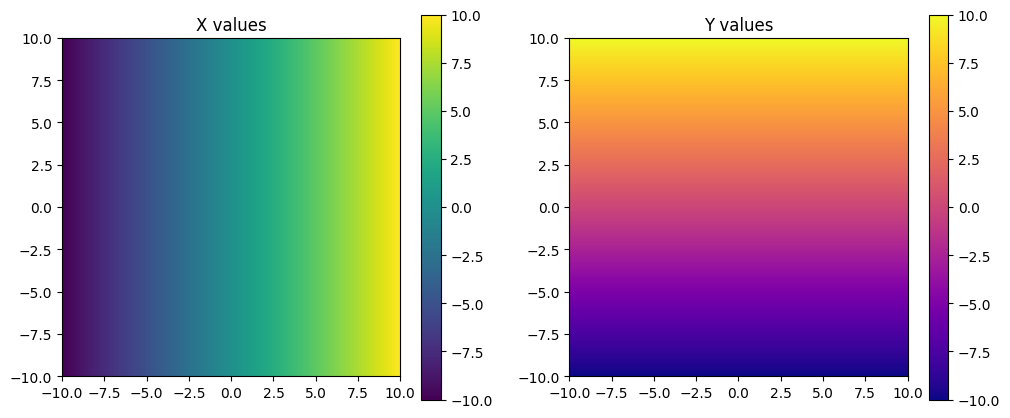

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xr = np.linspace(-10, 10, 201)
yr = np.linspace(-10, 10, 201)

X, Y = np.meshgrid(xr, yr)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(X, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis')
axes[0].set_title("X values")
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(Y, extent=[-10, 10, -10, 10], origin='lower', cmap='plasma')
axes[1].set_title("Y values")
fig.colorbar(im2, ax=axes[1])

plt.show()

<div class="alert alert-block alert-warning">
<font color='black'>

    
Display the 2D images `X` and `Y` with colorbars to confirm that these values are what you expect.
    

</font>
</div>

<div class="alert alert-block alert-success">
<font color='black'>
The above code forms a grid of coordinate values on which you can evaluate various functions. <br/> <br/>

Let’s start with the following function:
<font size="2"> `F = np.cos(np.pi*X)` </font>
    
Plot this function below with colorbar, gray colormap, and proper axis labels.
    
</font>
</div>

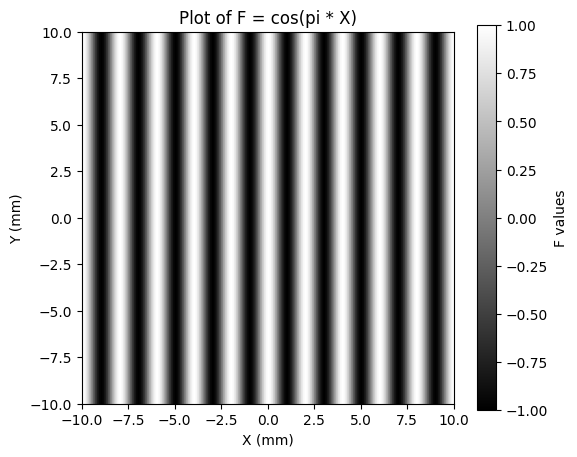

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xr = np.linspace(-10, 10, 201)
yr = np.linspace(-10, 10, 201)

X, Y = np.meshgrid(xr, yr)

F = np.cos(np.pi*X)
plt.figure(figsize=(6, 5))
plt.imshow(F, extent=[-10, 10, -10, 10], origin='lower', cmap='gray')
plt.colorbar(label='F values')
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Plot of F = cos(pi * X)")
plt.show()

<div class="alert alert-block alert-warning">
<font color='black'>
We’d like to take the 2D Fourier transform of this function and display the results. To do this, first import the following functions:<br/> <br/>   

<font size="2"> `from numpy.fft import fft2, fftshift, ifftshift` </font> <br/><br/>   
    
The function `fft2` performs Fast Fourier transform. However, to use this function correctly, one needs to know several things. First, this function expects a particular organization of your 2D function. Specifically, the origin `(0,0)` of your data must be correctly placed. While the code written above is good for visualization of the function, it is not in the correct form for `fft2`.
<br/> <br/>
The figure below shows a typical interpretation of 2D image data on the left and Python’s requirement for the data prior to using `fft2`. Fortunately, a command is provided to swap data quadrants for you. The command is called `ifftshift`.
<br/> <br/>
Note that the precise location of the origin after `ifftshift` is always in the upper left corner.
    
</font>
</div>

<img src="Lab2\SwapQuadrants.png" style="width:700px">


<div class="alert alert-block alert-warning">
<font color='black'>

Prior to using `ifftshift` the location of the origin depends on the size of the image:
- For odd-sized images, the origin lies at the center pixel.
- For even-sized images, the origin lies just to the right and below the center.

Example positions of the origin pixel (green) in odd- and even-sized images are shown below.
</font>
</div>

<img src="Lab2\OddEvenImage.png" style="width:400px">

<div class="alert alert-block alert-warning">
<font color='black'>

You can now Fourier transform your 2D-function; however, you need to know how to label the resulting Fourier-domain result.
    
<b>Note that in the `fft2` result, the frequency origin is in the upper left corner. </b>
    
Thus, to view the Fourier transform normally you need to apply `fftshift` to the result.

    
Recall that the Fourier transform of your function is, generally, complex-valued. Thus, to display the Fourier transform, you have to select how to display these potentially complex values. Options include displaying only real or imaginary parts (via `np.real` or `np.imag`) or the magnitude (via `np.abs`).
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color='black'>
    
It remains to find out the coordinates for your Fourier transform data. You already know that the maximum frequency found in sampled data is given by the Nyquist frequency, which you can compute given the original sampling frequency. The frequency origin (e.g., the zero frequency DC value) is located as described above, and the Fourier transform you have taken given you both positive and negative frequencies. Thus, you should be able to label your axes. Again, there is a little complexity involved based on image size (e.g. an $N \times N$ image):
    

The Fourier domain interval is <font size="4"> $\frac{1}{N \cdot a}=\frac{f_s}{N}$ </font>, where $a$ is the sampling period<br/><br/>
The frequency axis therefore can be <br/>

- For odd-sized images, your frequency samples go from <font size="4">$(-\frac{f_s}{2}) \cdot (\frac{N-1}{N}$)</font> to <font size="4">($\frac{f_s}{2}) \cdot (\frac{N-1}{N}$)</font><br/><br/>
- For even-sized images, your frequency samples go from <font size="4">$(-\frac{f_s}{2} $)</font> to zero to <font size="4">($\frac{f_s}{2}) \cdot (\frac{N-2}{N}$)</font>

</font>
</div>

# Question 1

<div class="alert alert-block alert-success">

<font color='black'> <b>(a)</b> Using the x- and y-ranges given in CODE BLOCK 1 (shown above), what is the sampling frequency for your function? </font>
    
</div>

f(sampling) = 200 / (10 - (-10)) = 10 Hz

<div class="alert alert-block alert-success">    
    
<font color='black'> <b>(b)</b> Given this sampling frequency, what is the Nyquist frequency?  </font>     
    

</div>

Nyquist frequency is half the sampling frequency: Nf = f(sampling)/2 = 10 Hz/ 2 = 5 Hz

<div class="alert alert-block alert-success">    
<font color='black'> <b>(c)</b> Recall that Fourier coefficients are complex valued. Show the real, imaginary, and magnitude components of your Fourier-transformed function with properly labeled axes and colorbars.   </font>
   
</div>

F = np.cos(np.pi*X)

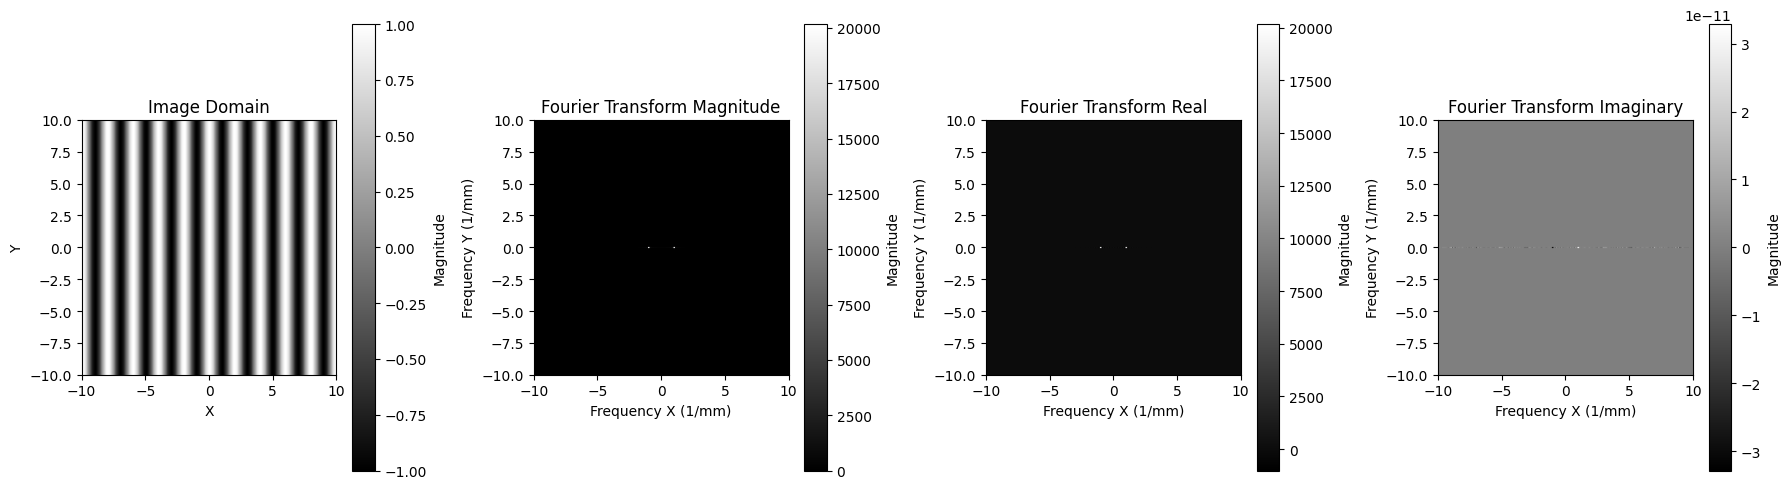

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifftshift

def fourier(function, x1=-10, x2=10, y1=-10, y2=10, fs=10):
    xr = np.linspace(x1, x2, ((x2 - x1) * fs + 1))
    yr = np.linspace(y1, y2, ((y2 - y1) * fs + 1))

    X, Y = np.meshgrid(xr, yr)

    F = function(X, Y)

    F_shifted = ifftshift(F)

    F_fourier = fft2(F_shifted)

    F_fourier_shifted = fftshift(F_fourier)

    magnitude = np.abs(F_fourier_shifted)
    real = np.real(F_fourier_shifted)
    imag = np.imag(F_fourier_shifted)

    fig, axes = plt.subplots(1, 4, figsize=(18, 5))

    # Image Domain
    

    # Magnitude plot
    im0 = axes[0].imshow(F, extent=[x1, x2, y1, y2], origin='lower', cmap='gray')
    axes[0].set_title("Image Domain")
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    fig.colorbar(im0, ax=axes[0], label='Magnitude')

    # Real part plot
    im1 = axes[1].imshow(magnitude, extent=[x1, x2, y1, y2], origin='lower', cmap='gray')
    axes[1].set_title("Fourier Transform Magnitude")
    axes[1].set_xlabel("Frequency X (1/mm)")
    axes[1].set_ylabel("Frequency Y (1/mm)")
    fig.colorbar(im1, ax=axes[1], label='Magnitude')
    # Imaginary part plot
    im2 = axes[2].imshow(real, extent=[x1, x2, y1, y2], origin='lower', cmap='gray')
    axes[2].set_title("Fourier Transform Real")
    axes[2].set_xlabel("Frequency X (1/mm)")
    axes[2].set_ylabel("Frequency Y (1/mm)")
    fig.colorbar(im2, ax=axes[2], label='Magnitude')
    
    im3 = axes[3].imshow(imag, extent=[x1, x2, y1, y2], origin='lower', cmap='gray')
    axes[3].set_title("Fourier Transform Imaginary")
    axes[3].set_xlabel("Frequency X (1/mm)")
    axes[3].set_ylabel("Frequency Y (1/mm)")
    fig.colorbar(im3, ax=axes[3], label='Magnitude')

    plt.tight_layout()
    plt.show()

def plot_log10mag(F_func, x1=-10, x2=10, y1=-10, y2=10, fs=10):
    xr = np.linspace(x1, x2, ((x2 - x1) * fs + 1))
    yr = np.linspace(y1, y2, ((y2 - y1) * fs + 1))

    X, Y = np.meshgrid(xr, yr)

    F = F_func(X, Y)

    F_shifted = ifftshift(F)

    F_fourier = fft2(F_shifted)

    F_fourier_shifted = fftshift(F_fourier)

    magnitude = np.abs(F_fourier_shifted)
    log_magnitude = np.log10(magnitude + 1e-10)

    plt.figure(figsize=(6, 5))
    plt.imshow(log_magnitude, extent=[x1, x2, y1, y2], origin='lower', cmap='gray')
    plt.colorbar(label='Magnitude (Log10)')
    plt.xlabel("Frequency X (1/mm)")
    plt.ylabel("Frequency Y (1/mm)")
    plt.title("Log Magnitude of Fourier Transform")
    plt.show()


F_func = lambda X, Y: np.cos(np.pi * X)
fourier(F_func, -10, 10, -10, 10, 10)

<div class="alert alert-block alert-success">    
<font color='black'> <b>(d)</b> Explain what you see in these images. (e.g. Where are peaks found, how do real, imaginary, and magnitude components compare, etc.?)   </font>
   
</div>

Magnitude plot (left image): The peaks are found at X=±1 along the x-axis; this shows our expected Fourier transform of a cosine function which is supposed to produce two delta-like peaks at its frequency components

Real part (middle image): The pattern is similar to the magnitude plot; this shows the real-valued components of the Fourier transform of the cosine function

Imaginary part (right image): The imaginary component is nearly zero everywhere except for along the y=0 line in which there are slight peaks and dips; this shows that the input function (cosine) is a majority real and even

# Question 2

<div class="alert alert-block alert-success">    
<font color='black'>

Change your function to `np.cos(np.pi*X+np.pi/2)` and show the real, imaginary, and magnitude components again. <br/>Why do they look like they do?   </font>
    
</div>

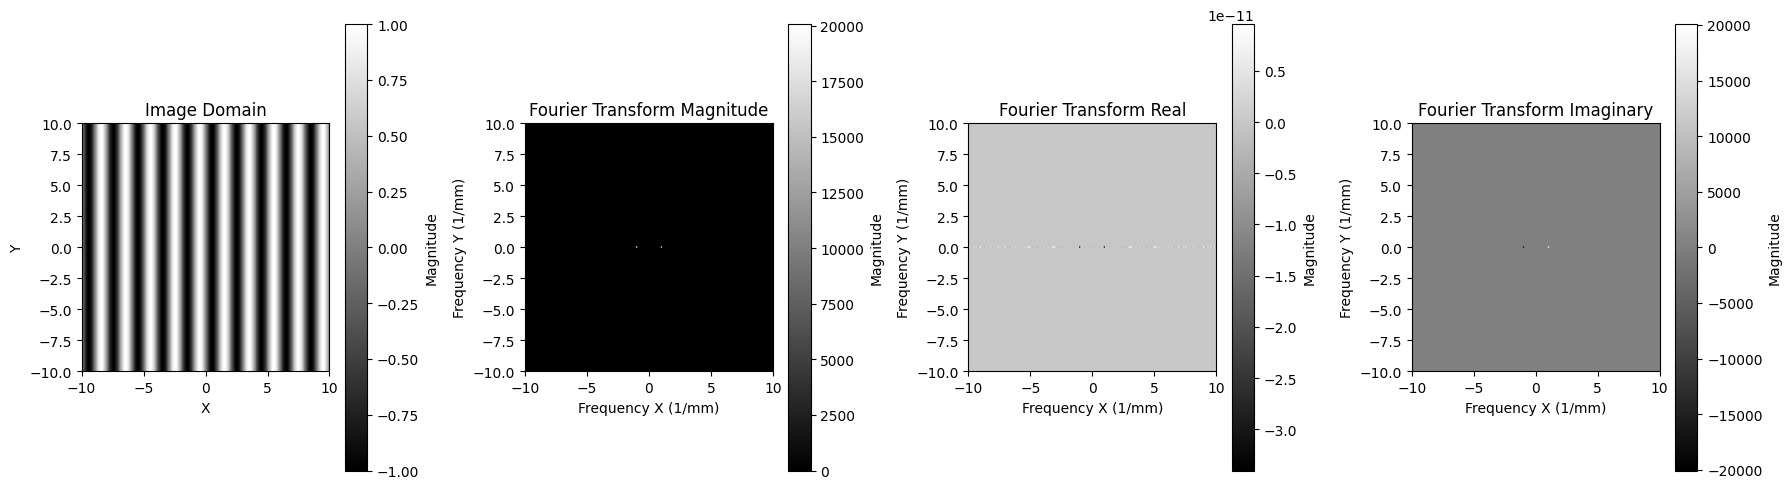

In [14]:
F_func = lambda X, Y: np.cos(np.pi * X + np.pi/2)
fourier(F_func, -10, 10, -10, 10, 10)

The Fourier transform results have changed because the function now includes a phase shift, which modifies the cosine function.

Magnitude plot (left):The peaks are still at X=±1; frequency content of the function did not change, only the phase did

Real part (middle): The real component is nearly zero. Unlike the previous case where the function was a pure cosine, this one is a sine function.

Imaginary part (right): The imaginary component has dominant peaks; this shows that the function has shifted from a cosine w/ real Fourier coefficients to a sine w/ imaginary Fourier coefficients

# Question 3

<div class="alert alert-block alert-success">    
<font color='black'>
    
For the following functions, show the properly labeled image-domain and Fourier transform pairs (real and magnitude):   


- `np.cos(np.pi*X + 2*np.pi*Y)`
    
- `np.cos(np.pi*X + 4*np.pi*Y)`


Describe the difference between these two functions.
</div>

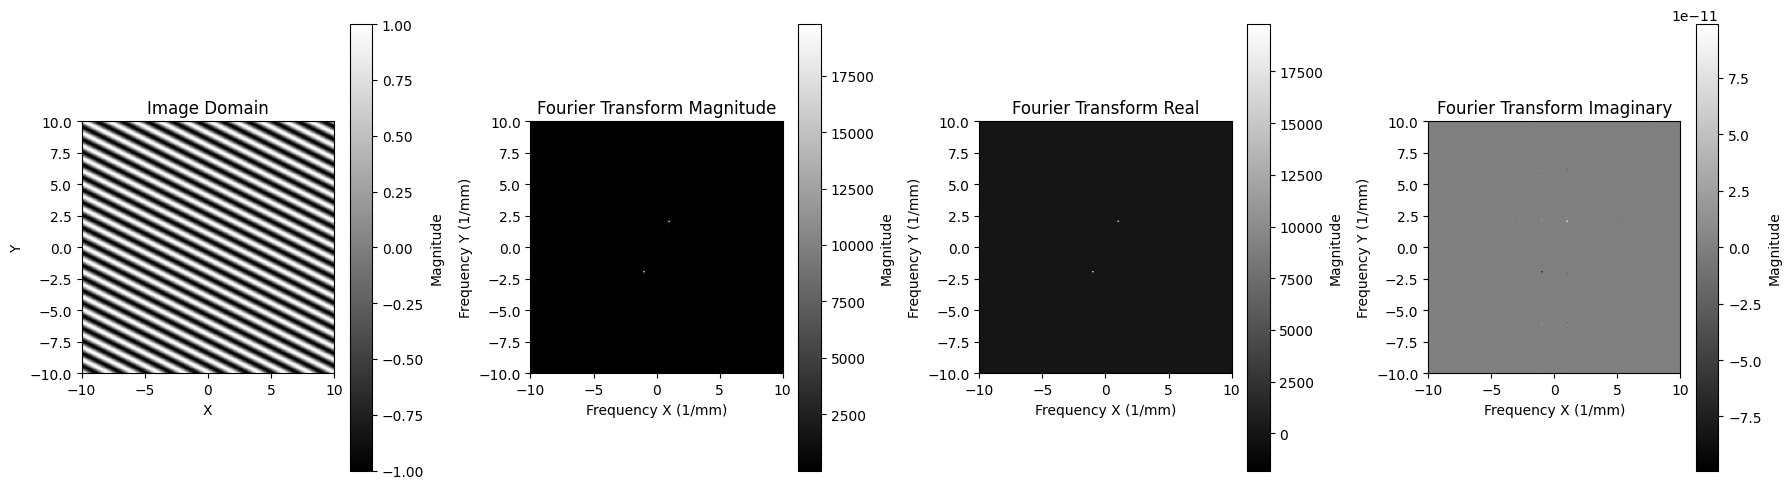

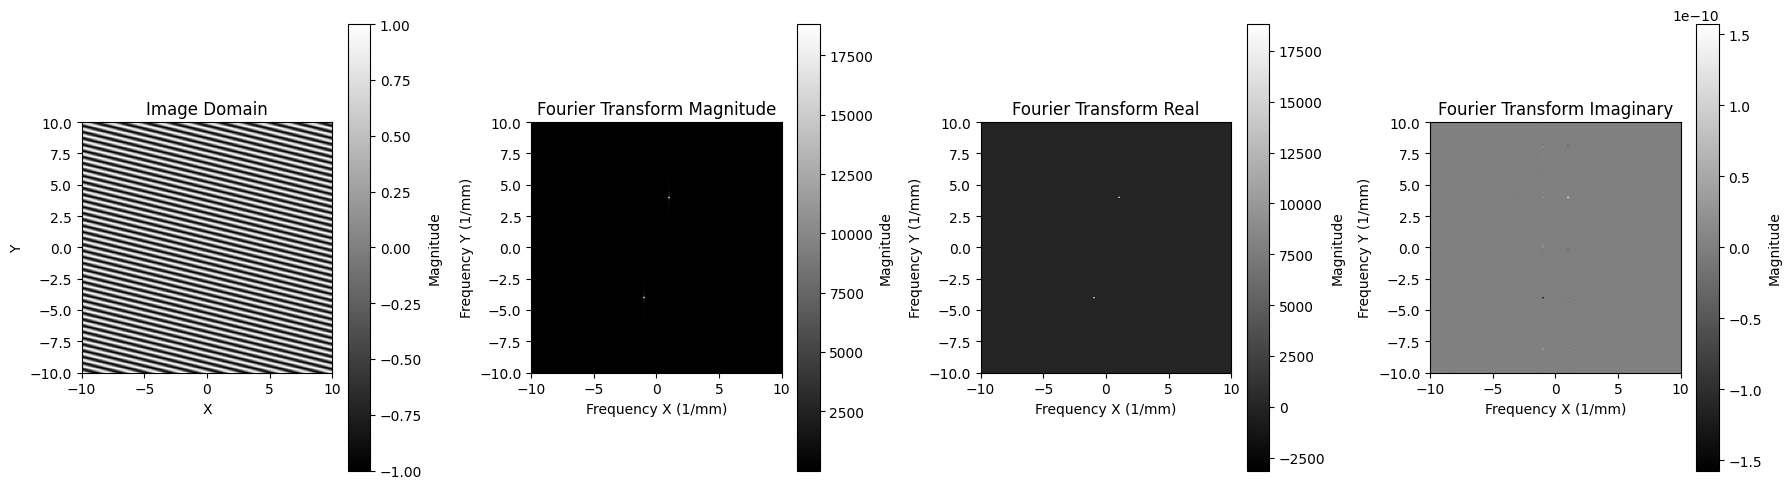

In [15]:
F_func = lambda X, Y: np.cos(np.pi*X + 2*np.pi*Y)

fourier(F_func, -10, 10, -10, 10, 10)

F_func = lambda X, Y: np.cos(np.pi*X + 4*np.pi*Y)
fourier(F_func, -10, 10, -10, 10, 10)

1st function is a plane wave oriented diagonally with spatial frequency components (pi, 2pi)
2nd function is similar but with a higher frequency in the Y-direction, with components (pi, 4pi)

Fourier Transform Differences:
- Both functions exhibit two peaks in the frequency domain corresponding to their respective spatial frequencies
- The second function has a higher frequency in the Y-direction so its Fourier peaks to be spaced farther apart along the Y-axis compared to the first function
- The second function also has stripes that are angled slightly differently, and thus the dots in the fourier domain are spaced out along a different angle than the first function

# Question 4

<div class="alert alert-block alert-success">    
<font color='black'>

Next consider:
`(np.abs(X)<sz) * (np.abs(Y)<sz) for sz={0.2, 0.5, 1.0}`

Describe the difference between these three functions.
</div>

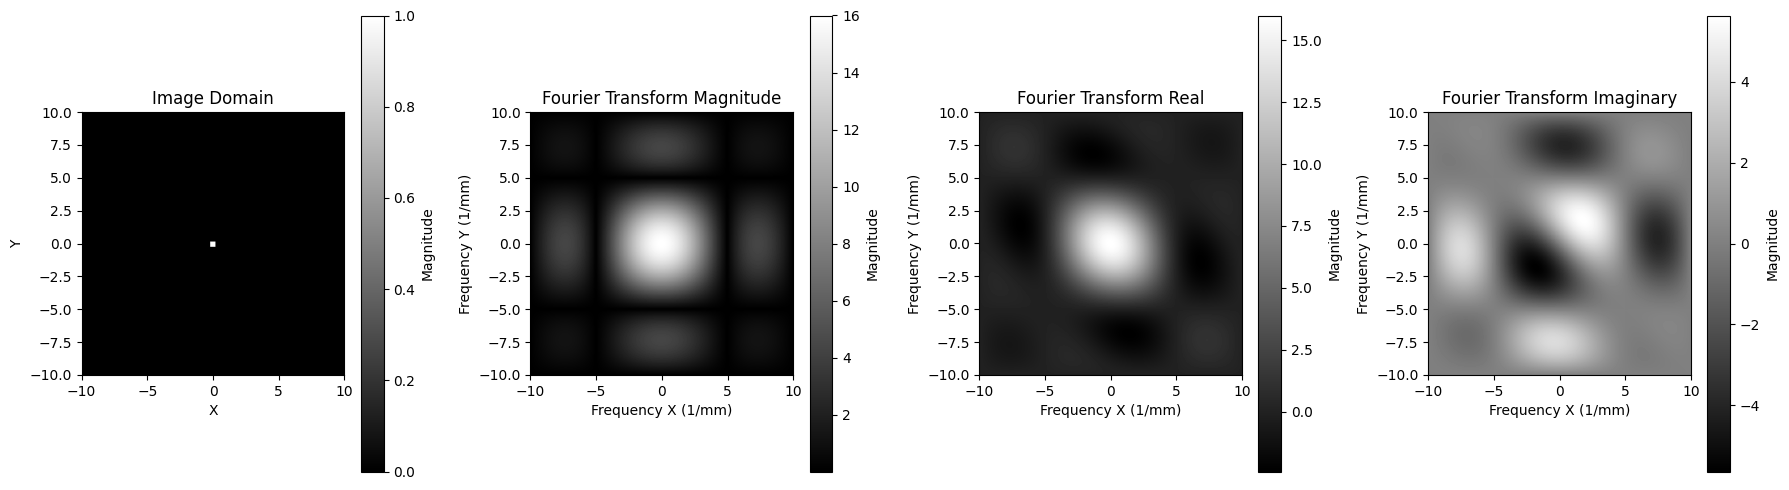

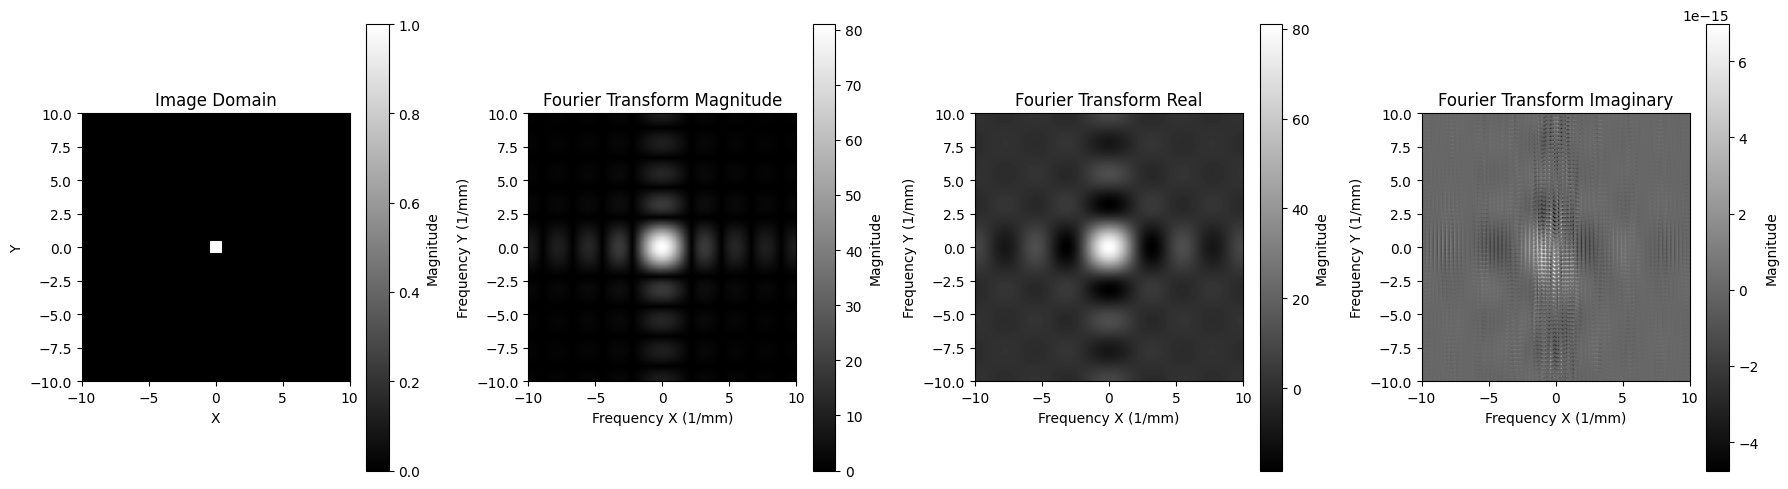

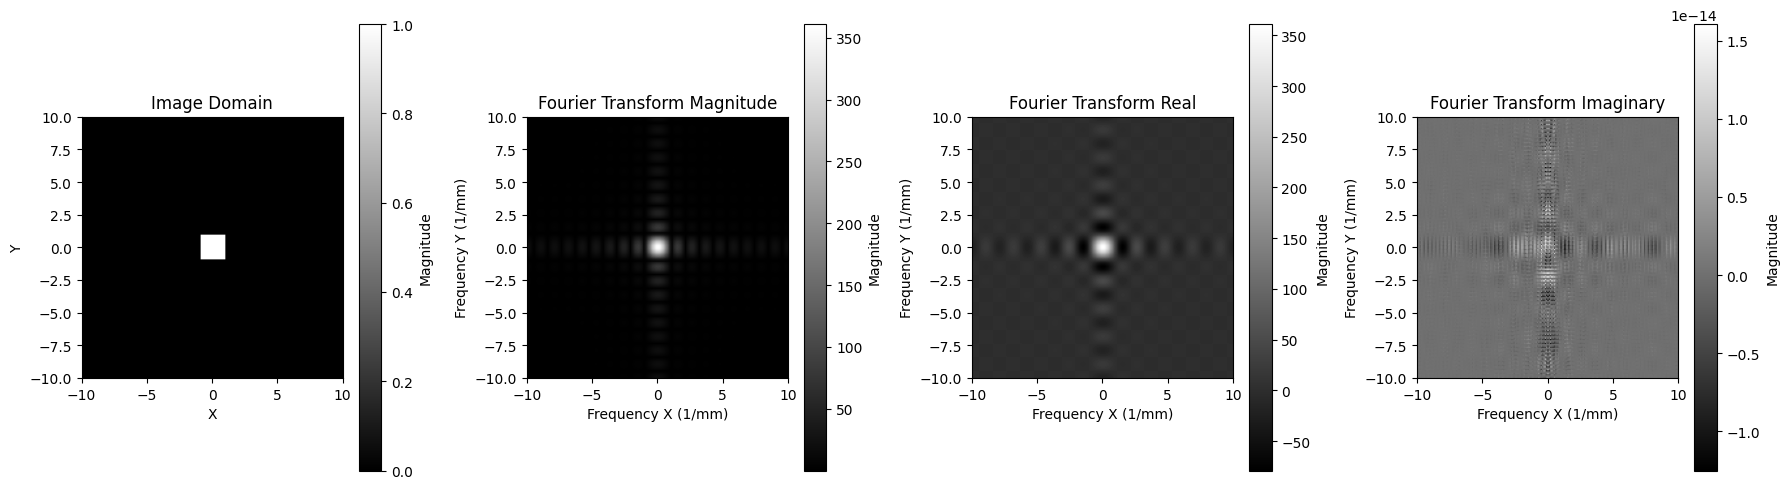

In [16]:
for sz in [0.2, 0.5, 1.0]:
    F_func = lambda X, Y: (np.abs(X)<sz) * (np.abs(Y)<sz)
    fourier(F_func, -10, 10, -10, 10, 10)

(np.abs(X)<sz)*(np.abs(Y)<sz) is a logical mask that selects points within a square region centered at the origin; the size of the square is determined by the parameter sz
Size of the Selected Region:
   - When sz = 0.2 region is a small square with sides of length 0.4
   - When sz = 0.5, the square increases in size to a side length of 1.0
   - When sz = 1.0, the square further expands to a side length of 2.0
I.E. smaller sz results in a more selective filter that includes fewer points and larger sz encompasses a wider region, increasing the number of points included in the selection

# Question 5

<div class="alert alert-block alert-success">    
<font color='black'>
    
We are often interested in signal power in decibels which requires a logarithmic scaling of the frequency values. <br/><br/>
Show properly labeled image-domain and Fourier transform pairs (real, magnitude, and log10 magnitude) for the following functions:
    

`np.sqrt(X**2 + Y**2)<sz for sz={1.0, 2.0}`

Why might you prefer to look at log10 data?
</div>

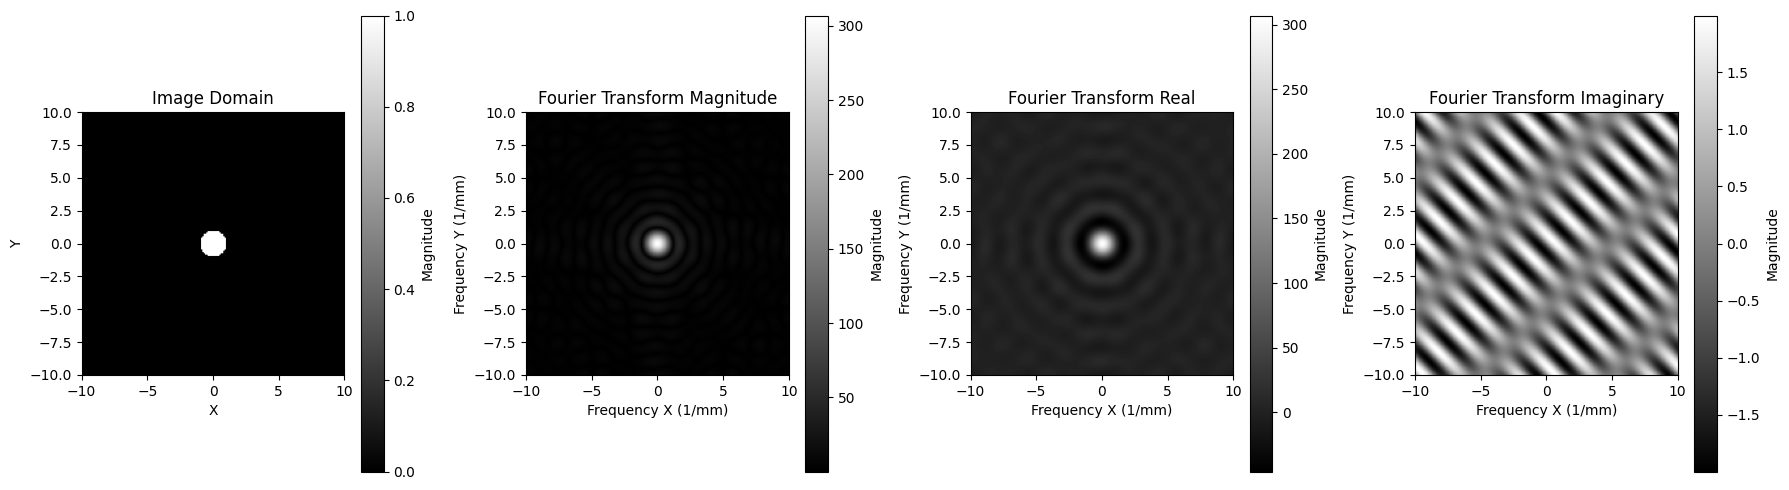

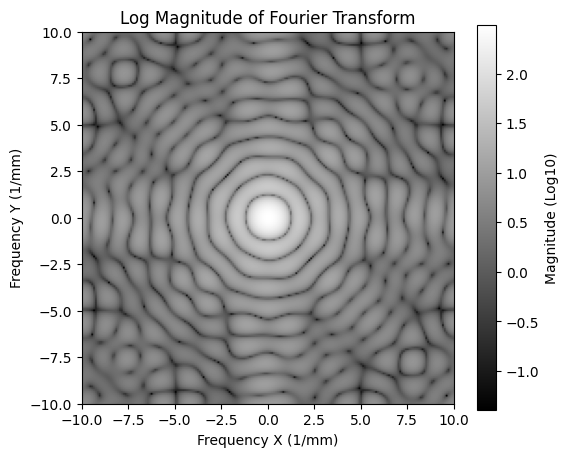

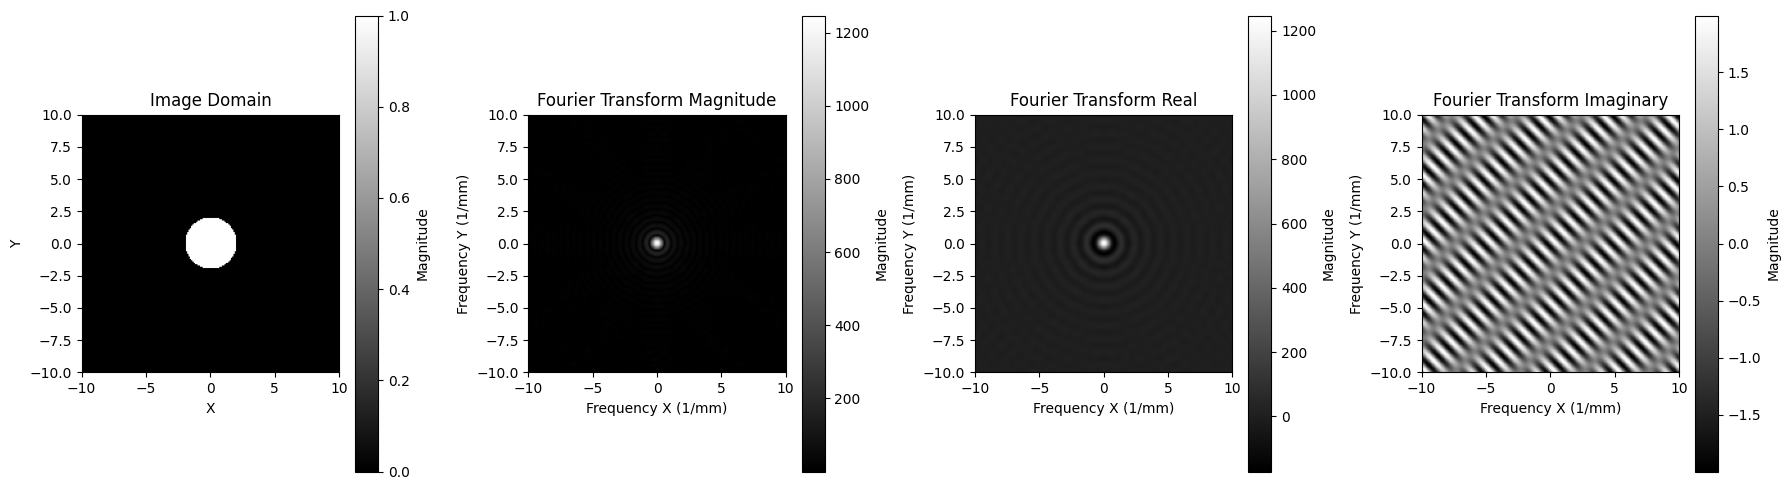

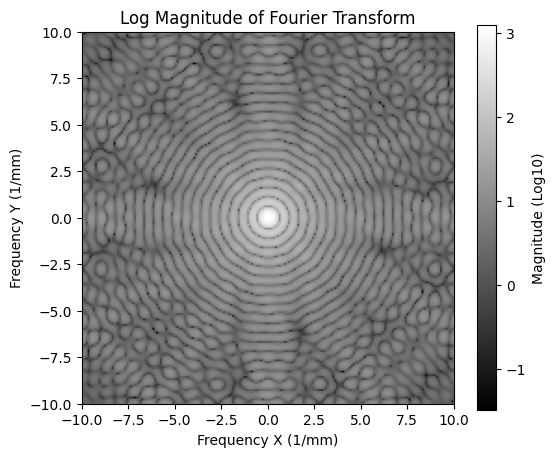

In [17]:
for sz in [1.0, 2.0]:
    F_func = lambda X, Y: np.sqrt(X**2 + Y**2)<sz
    fourier(F_func, -10, 10, -10, 10, 10)
    plot_log10mag(F_func, -10, 10, -10, 10, 10)

Using log10 scaling is better because it reveals low-intensity frequency components that would be hidden on a linear scale. Since the Fourier magnitude can span several orders of magnitude, log scaling makes details across all intensities more interpretable. Also, structures in the frequency domain become easier to see.

# Question 6

<div class="alert alert-block alert-success">    
<font color='black'>
    
We know that sampling limits our representation of the underlying function. <br/><br/>
Show properly labeled image-domain and Fourier transform pairs (magnitude only) for the following functions:

- `np.cos(np.pi*(X+Y)*m) for m={3,6,12,18}`
- `np.sin(np.sqrt(X**2+Y**2)*m) for m={10,20,40}` <br/>

Describe what you see and explain.
</div>

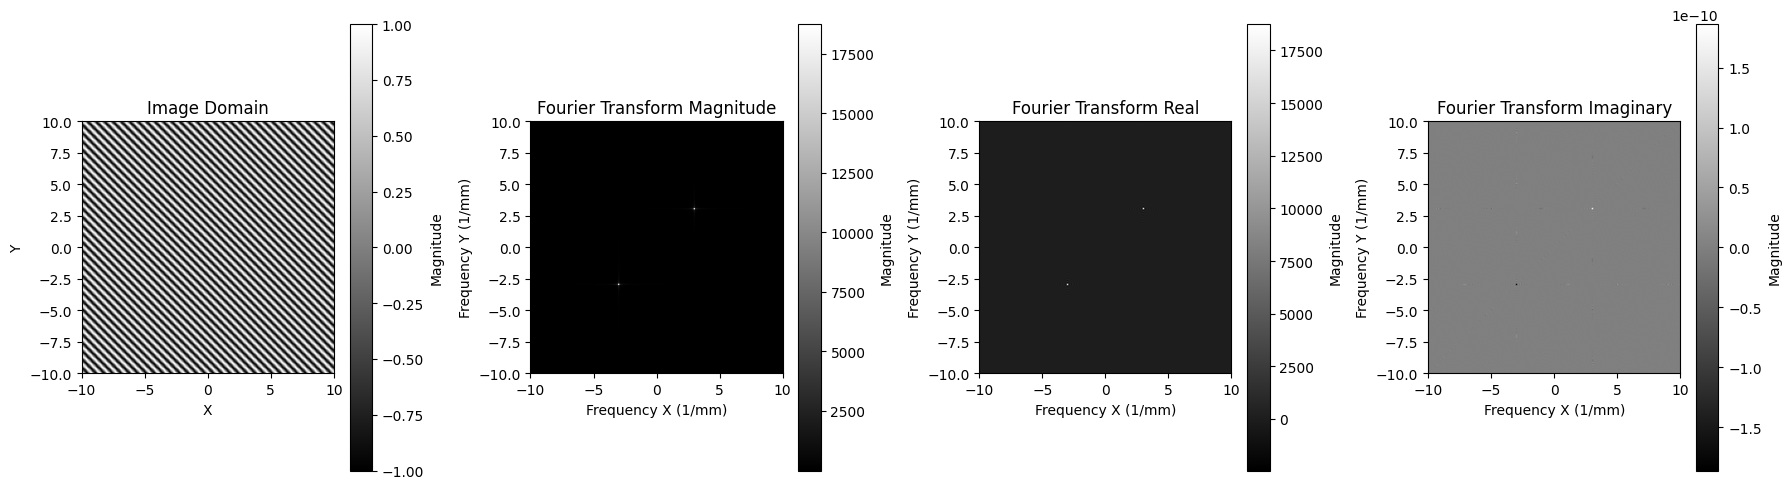

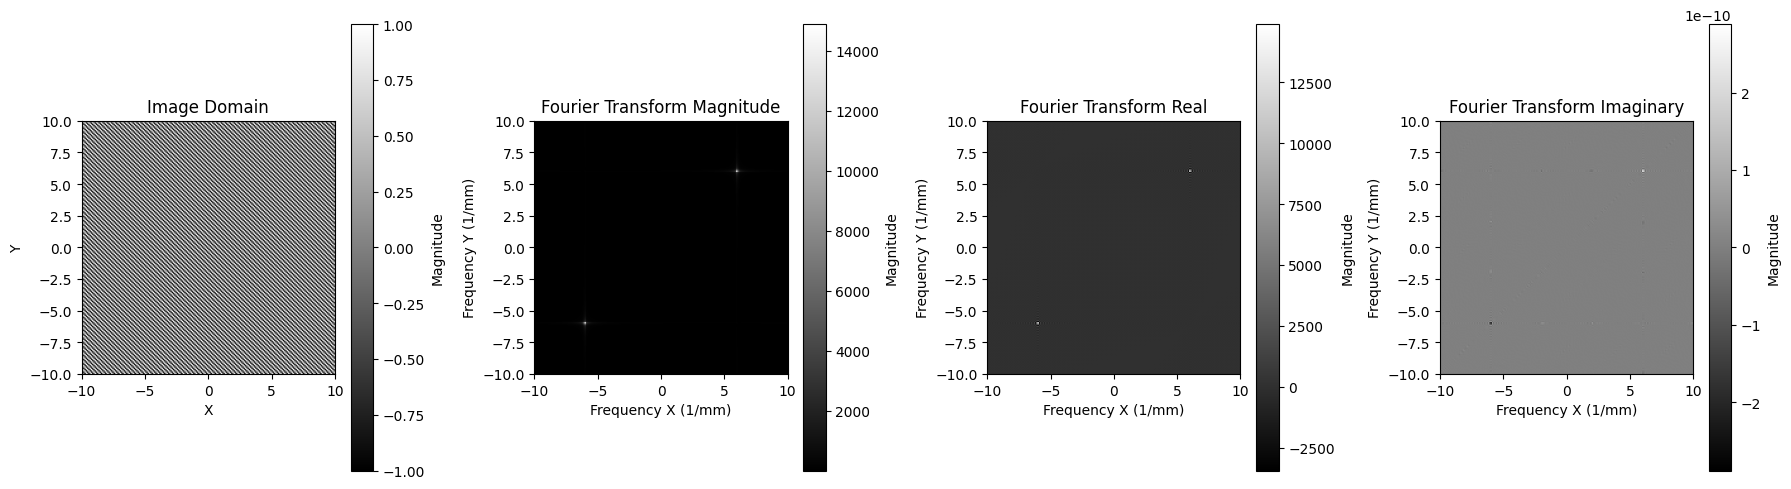

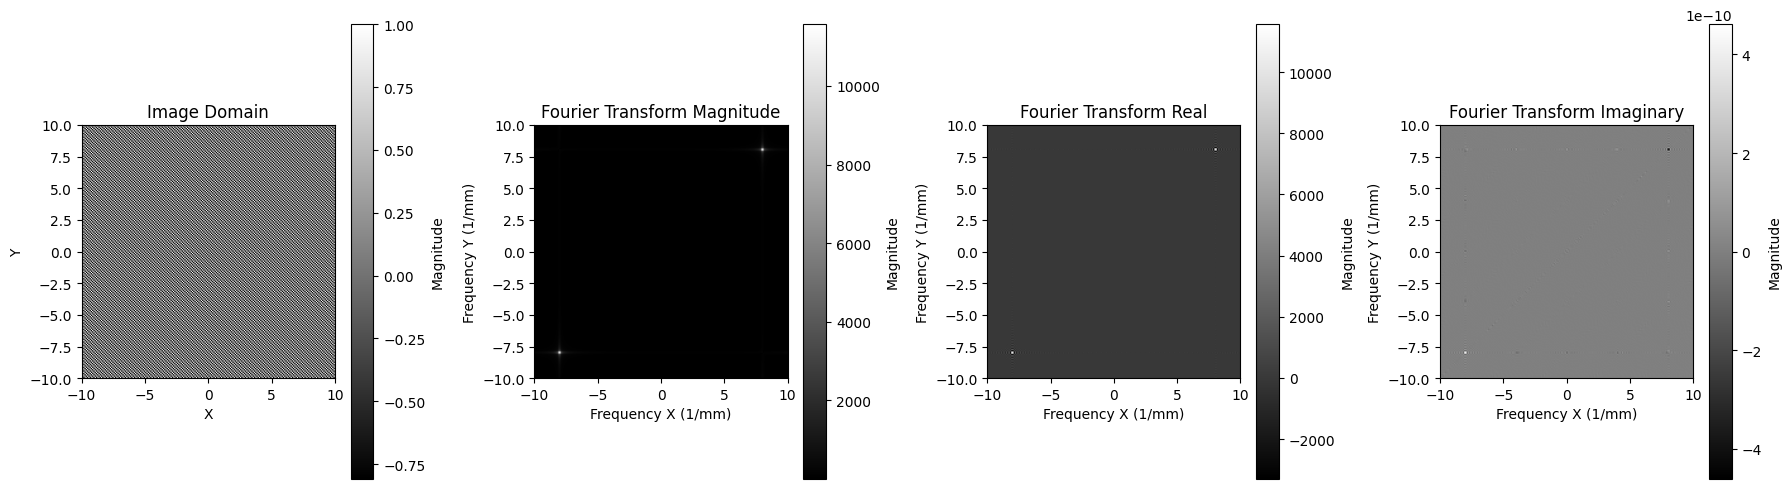

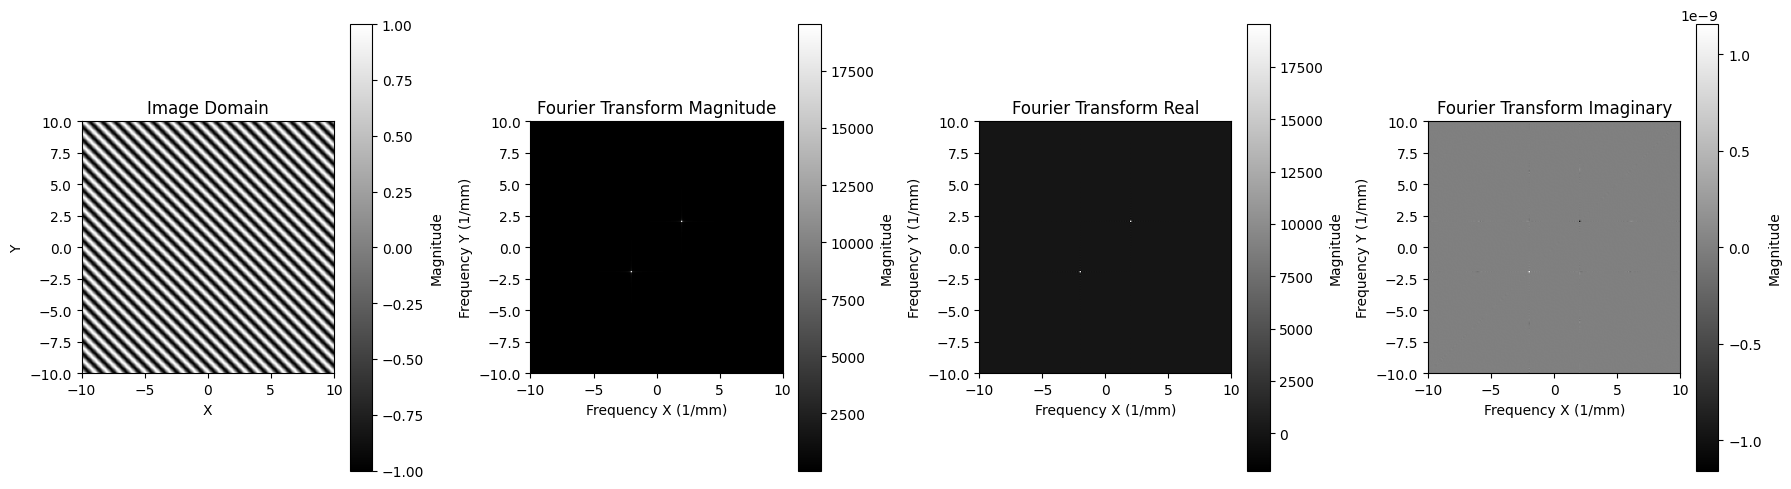

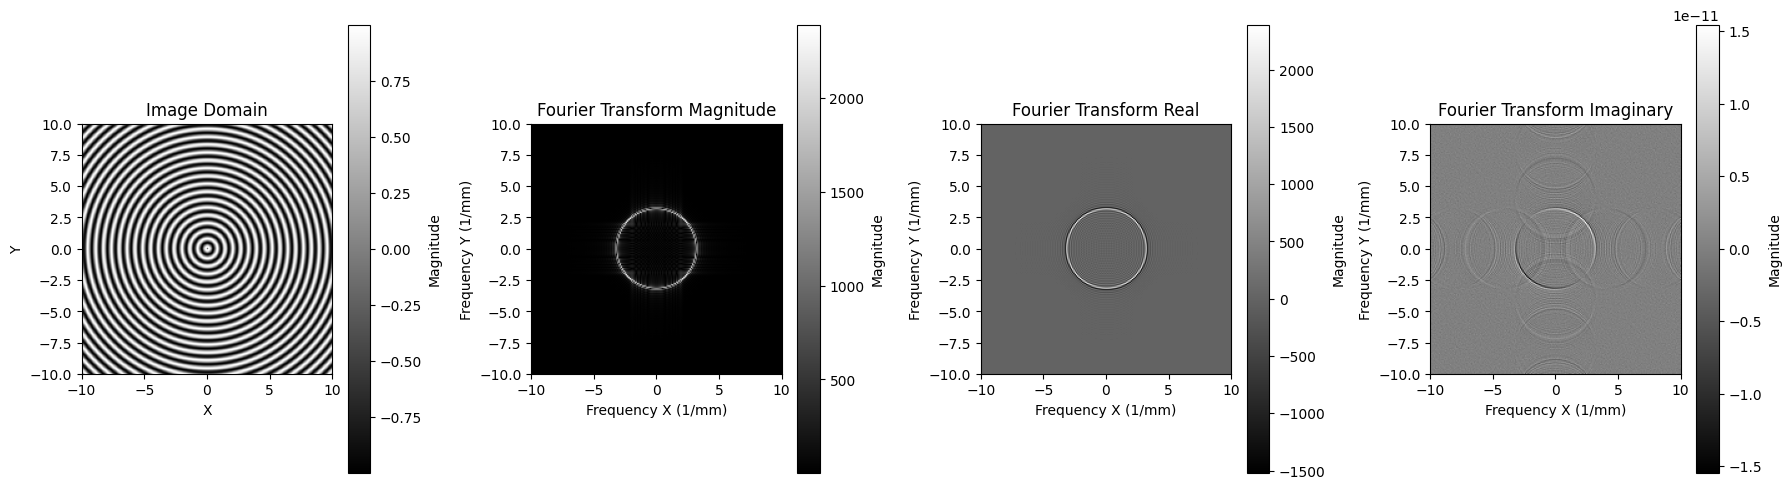

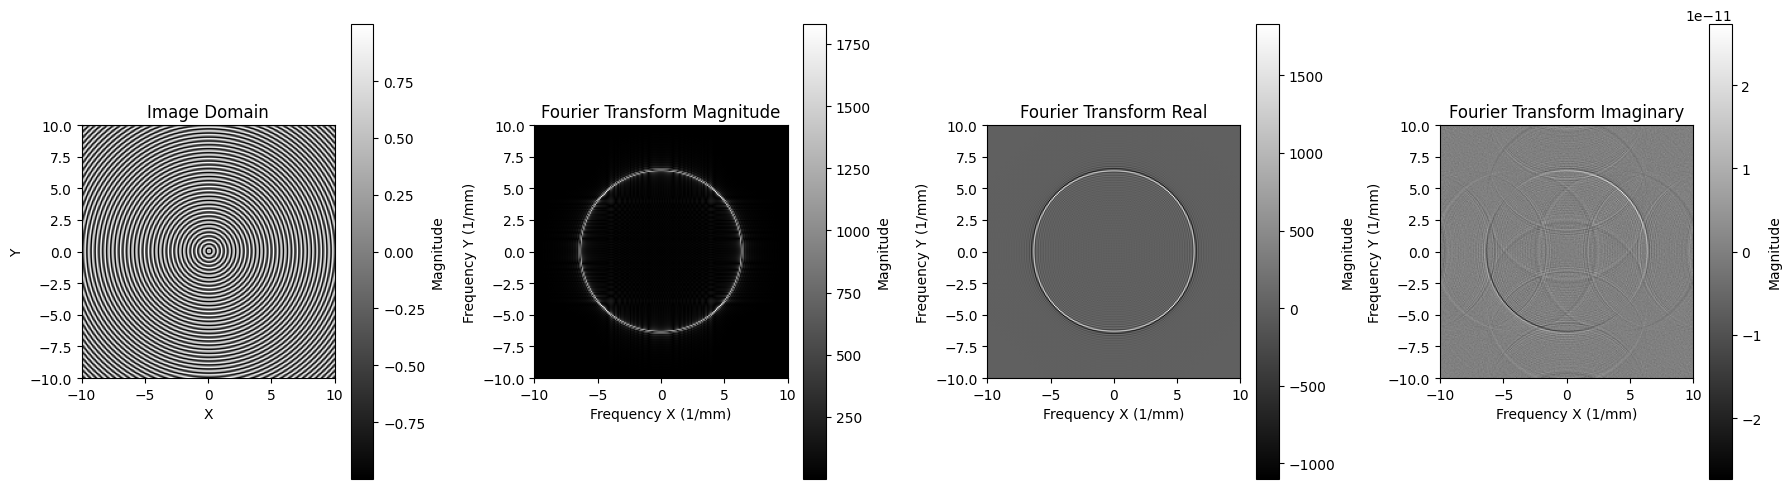

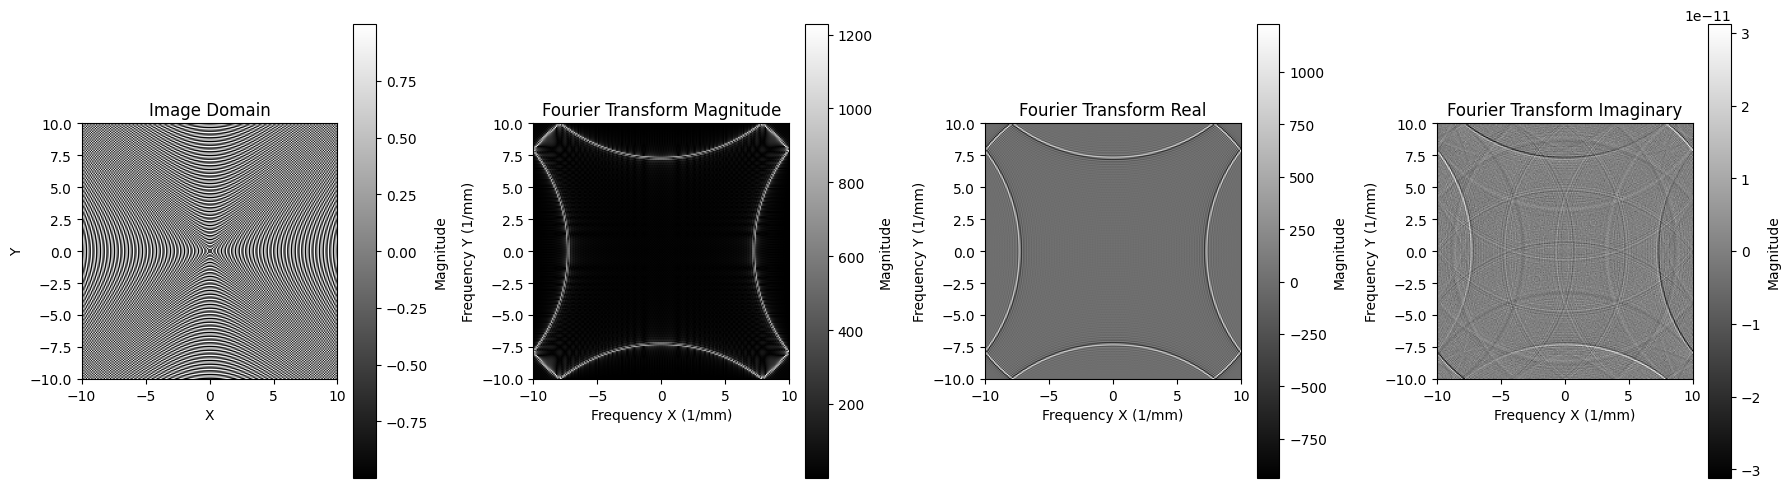

In [ ]:
for m in [3,6,12,18]:
    F_func = lambda X, Y: np.cos(np.pi*(X+Y)*m)
    fourier(F_func, -10, 10, -10, 10, 10)

for m in [10,20,40]:
    F_func = lambda X, Y: np.sin(np.sqrt(X**2+Y**2)*m)
    fourier(F_func, -10, 10, -10, 10, 10)

A plane wave has frequency content concentrated along a single direction and thus two sharp peaks in the Fourier domain. In contrast, a radially oscillating function spreads its frequency content in all directions, giving circularly symmetric rings in the Fourier domain

The cosine function (plane wave) produces two discrete Fourier peaks along the propagation axis whereas the sine function (radial waves) generates ring-like Fourier pattern due to its isotropic nature

In a plane wave, increasing m moves Fourier peaks outward from origin. As spatial frequency increases, corresponding Fourier components move farther from the origin showing inverse relationship between spatial scale and frequency

In a radial sine wave, increasing m makes Fourier rings expand outward. The higher frequencies result in broader Fourier distributions